# Analyse avec word Cloud
<p> On Analyse les diffèrents mots qui reviennent le plus en prenant comme colonne <strong> Sentiment </strong> et <strong> OriginalTweet </strong> </p>

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64


Text(0.5, 1.0, 'Nuage de mots pour OriginalTweet')

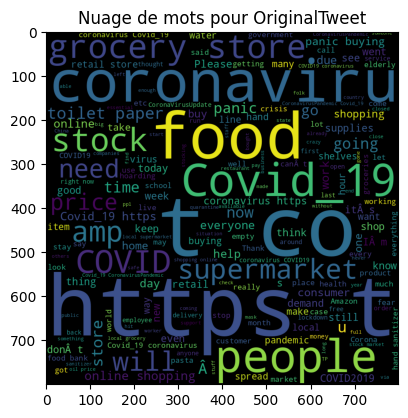

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# on Analyse les diffèrents mots qui reviennent le plus en prenant comme colonne Sentiment et OriginalTweet

# Charger les données à partir du fichier CSV
train = pd.read_csv('/content/Corona_NLP_test.csv', encoding="iso-8859-1")
test = pd.read_csv('/content/Corona_NLP_train.csv', encoding="iso-8859-1")


# afficher le nombre des diffèrents avis (positive, negative, extrement positive et extrement negative)
print(train.Sentiment.value_counts())

Corona = train[['OriginalTweet','Sentiment']]

# creation du nuage de mots pour la colonne 'OriginalTweet'
listOriginal = ' '.join([tweet for tweet in train["OriginalTweet"]])

wordCloud = WordCloud(width=800, height=800, random_state=2024).generate(listOriginal)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordCloud)
plt.title('Nuage de mots pour OriginalTweet')




# Analyse à travers les sentiments
 <p> Générations des nuages de mots distincts pour chaque catégorie de sentiment dans les données </p>

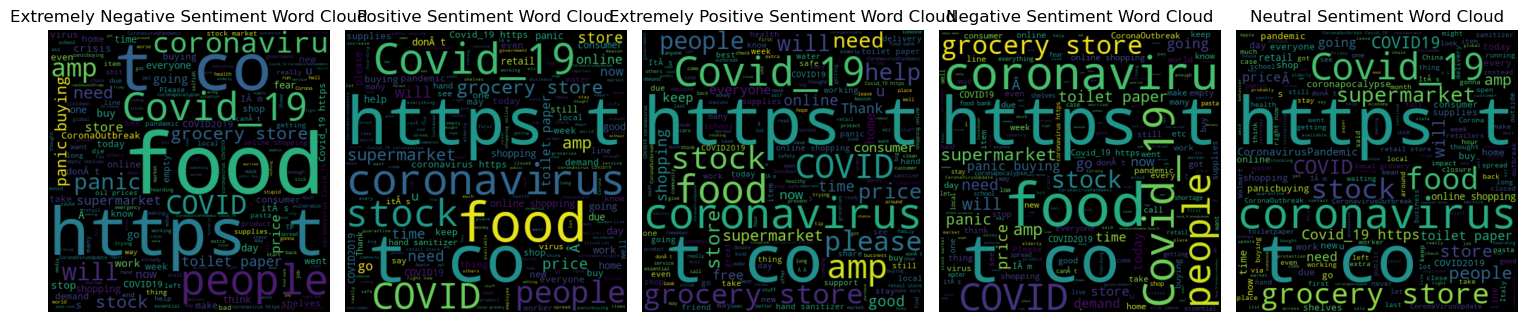

In [ ]:

unique_sentiments = train['Sentiment'].unique()

# Créer un nuage de mots pour chaque sentiment
wordclouds = {}
plt.figure(figsize=(15, 5))

for i, sentiment in enumerate(unique_sentiments, start=1):
    sentiment_text = ' '.join(train[train['Sentiment'] == sentiment]['OriginalTweet'].tolist())
    wordcloud = WordCloud(width=400, height=400, random_state=2024).generate(sentiment_text)

    plt.subplot(1, len(unique_sentiments), i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment} Sentiment Word Cloud')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


# Récupération en utilisant keras

In [ ]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
